In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [216]:
df = pd.read_csv("../dataset/wk9/knn_data.csv")

df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

categories = df_y.unique()

In [230]:
def visualize(X):
    global df_X
    df_X_visualization = normalization(df_X)

    for category in categories:
        category_index = np.where(df_y == category)[0]
        df_X_category = df_X_visualization.iloc[category_index]


        plt.scatter(df_X_category['Height'], df_X_category['weight'])
        plt.xlabel("Height")
        plt.ylabel("Weight")

    plt.scatter(X[0], X[1])

In [231]:
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)

    normal = (X - mean) / std

    return normal



In [232]:
def predict(dataset, X, k):
    global df_X
    xx = pd.DataFrame({"Height": [X[0]], "weight": [X[1]]})
    dataset = pd.concat([dataset, xx], ignore_index=True)
    dataset = normalization(dataset)
    x =  dataset.iloc[-1]
    dataset = dataset.iloc[:-1, :]
    difference = dataset - x
    distance = np.power(difference, 2)
    distance = np.sum(distance, axis=1)
    distance = np.sqrt(distance)

    k_nearest = df_y[np.argsort(distance)[:k]]
    counter = Counter(k_nearest)

    visualize(x)

    return counter.most_common(1)[0][0]

'L'

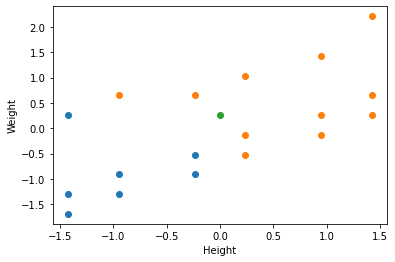

In [237]:
predict(df_X, [164, 63], 5)